<a href="https://colab.research.google.com/github/Mansi1911999/Web-Scraping-Project/blob/main/Numerical_Programming_in_Python_Web_Scraping%20By%20MansiGupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [7]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

## **Scrapping Movies Data**

In [8]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'lxml')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
movie_url_list = []

movie_url = soup.find_all("a", class_ = "title-list-grid__item--link")
for link in movie_url:
  cnp ="https://www.justwatch.com"+ link.get("href")
  url2 = cnp
  r = requests.get(url2)
  soup2 = BeautifulSoup(r.text, "lxml")
  movie_url_list.append(cnp)

print(len(movie_url_list))
print(movie_url_list)

100
['https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/bramayugam', 'https://www.justwatch.com/in/movie/poor-things', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/road-house-2024', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/murder-mubarak', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/aattam', 'https://www.justwatch.com/in/movie/black-magic-2024', 'ht

In [ ]:
def get_movie_data(link, tryCount = 0):
  # so that code doesn't get stuck in infinite loop
  if tryCount > 2:
    return ""

  # fetch data
  response = requests.get(link)

  # handle 429 error
  if response.status_code == 429:
    time.sleep(5)
    return get_movie_data(link, tryCount + 1)

  return BeautifulSoup(response.text, "lxml")

movies_data = []

for link in movie_url_list:
  movie_data = get_movie_data(link)
  movies_data.append(movie_data)


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
movie_title_list= []
for movie_data in movies_data:
  title_block = movie_data.find("div", class_="title-block").h1.text.split('(')[0]
  movie_title_list.append(title_block.strip())
print(len(movie_title_list))
print(movie_title_list)


100
['Hanu-Man', 'Teri Baaton Mein Aisa Uljha Jiya', 'Oppenheimer', 'Fighter', 'Anatomy of a Fall', 'Bramayugam', 'Poor Things', 'Animal', 'Dune', 'Manjummel Boys', 'Premalu', 'Road House', '12th Fail', 'Anyone But You', 'Murder Mubarak', 'Crew', 'Dune: Part Two', 'Aattam', 'Shaitaan', 'Kung Fu Panda', 'Article 370', 'Sam Bahadur', 'Merry Christmas', 'Godzilla x Kong: The New Empire', 'The Beekeeper', 'Madame Web', 'Laapataa Ladies', 'Salaar', 'Eagle', '365 Days', 'Kung Fu Panda 4', 'Anweshippin Kandethum', 'Abraham Ozler', 'The Kerala Story', 'Aquaman and the Lost Kingdom', 'Godzilla vs. Kong', 'Madgaon Express', 'Lover', 'Godzilla Minus One', 'Ferrari', 'Gaami', 'Dunki', 'Main Atal Hoon', 'Mission: Chapter 1', 'Joker', 'Migration', 'DJ Tillu', 'The Holdovers', 'The Goat Life', 'Damsel', "Harry Potter and the Philosopher's Stone", 'Operation Valentine', 'Chaari 111', 'She Said', 'Zara Hatke Zara Bachke', 'Yodha', 'The Gentlemen', 'Por', 'Jawan', 'Vadakkupatti Ramasamy', 'Red Eye', 'Ja

## **Scrapping release Year**

In [ ]:
#  Write Your Code here

releasing_year_list= []
for movie_data in movies_data:
  release_year_block = movie_data.find("div", class_="title-block")
  releasing_year_list.append(release_year_block.h1.span.text.strip()[1:-1])
print(len(releasing_year_list))
print(releasing_year_list)


100
['2024', '2024', '2023', '2024', '2023', '2024', '2023', '2023', '2021', '2024', '2024', '2024', '2023', '2023', '2024', '2024', '2024', '2024', '2024', '2008', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2023', '2024', '2020', '2024', '2024', '2024', '2023', '2023', '2021', '2024', '2024', '2023', '2023', '2024', '2023', '2024', '2024', '2019', '2023', '2022', '2023', '2024', '2024', '2001', '2024', '2024', '2022', '2023', '2024', '2020', '2024', '2023', '2024', '2005', '2024', '2011', '2023', '2013', '2024', '2024', '2024', '2013', '2022', '2024', '2014', '2024', '2024', '2016', '2023', '2023', '2019', '2017', '2023', '2021', '2023', '2014', '2023', '2024', '2022', '2023', '2024', '2018', '2024', '2023', '2021', '2023', '2024', '2019', '2016', '2024', '2018', '2014', '2020']


## **Scrapping Genres**

In [ ]:
#  Write Your Code here
movie_genre_list= []
for movie_data in movies_data:
  movie_genres = movie_data.find("h3", class_="detail-infos__subheading", string="Genres").find_next_sibling("div").text
  movie_genre_list.append(movie_genres)
print(len(movie_genre_list))
print(movie_genre_list)

100
['Comedy, Science-Fiction, Fantasy, Action & Adventure', 'Romance, Science-Fiction, Comedy, Drama', 'Drama, History', 'Mystery & Thriller, War & Military, Action & Adventure', 'Mystery & Thriller, Crime, Drama', 'Horror, Mystery & Thriller', 'Comedy, Science-Fiction, Drama, Romance', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Drama', 'Mystery & Thriller', 'Romance, Comedy', 'Mystery & Thriller, Action & Adventure', 'Drama', 'Comedy, Romance', 'Comedy, Crime, Mystery & Thriller, Romance', 'Comedy, Drama', 'Action & Adventure, Science-Fiction, Drama', 'Drama', 'Horror, Mystery & Thriller', 'Action & Adventure, Animation, Comedy, Kids & Family, Fantasy', 'Action & Adventure, Drama, Mystery & Thriller', 'Drama, War & Military, History', 'Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Action & Adventure, Fantasy', 'Drama, Action & Adventure, Mystery & Thriller', 'Fantasy, Action & Adventure, Science-Fiction, Mystery &

## **Scrapping IMBD Rating**

In [ ]:
#  Write Your Code here
rating_list =[]
for movie_data in movies_data:
  try:
    movie_rating = movie_data.find_all("div", class_= "jw-scoring-listing__rating")[1].span.span.text[1:4]
  except IndexError:
    movie_rating = 'NaN'
  rating_list.append(movie_rating)

print(len(rating_list))
print(rating_list)

100
['8.0', '6.5', '8.3', '6.4', '7.7', '8.0', '7.9', '6.2', '8.0', '8.7', '8.3', '6.2', '9.0', '6.2', '6.5', '7.8', '8.8', '8.3', '7.8', '7.6', '8.2', '7.8', '7.0', '6.5', '6.4', '3.8', '8.4', '6.5', '6.4', '3.3', '6.4', '7.5', '6.6', '7.0', '5.6', '6.3', '8.3', '7.1', '8.3', '6.5', '7.0', '6.7', '7.0', '6.0', '8.4', '6.7', '7.2', '7.9', '8.8', '6.1', '7.6', '5.2', '5.4', '7.3', '6.8', '6.3', '7.8', '5.2', '7.0', '6.2', '6.5', '7.9', '7.3', '6.8', '8.2', '6.0', '6.5', '6.6', '8.1', '8.3', '7.8', '8.7', '4.9', '5.1', '7.1', '7.5', '7.6', '6.0', '6.6', '7.6', '7.6', '6.9', '6.4', '7.4', '5.7', '6.7', '6.3', '5.3', '8.2', '7.8', '6.5', '8.2', '4.4', '6.5', '8.2', '8.0', '5.4', '6.3', '7.4', '7.4']


## **Scrapping Runtime/Duration**

In [ ]:
#  Write Your Code here
runtime_list = []
for movie_data in movies_data:
  movie_runtime = movie_data.find("h3", class_="detail-infos__subheading", string="Runtime").find_next_sibling("div").text
  runtime_list.append(movie_runtime)

print(len(runtime_list))
print(runtime_list)

100
['2h 39min', '2h 21min', '3h 0min', '2h 47min', '2h 32min', '2h 19min', '2h 21min', '3h 21min', '2h 35min', '2h 15min', '2h 36min', '2h 1min', '2h 27min', '1h 43min', '2h 22min', '1h 58min', '2h 47min', '2h 19min', '2h 10min', '1h 33min', '2h 38min', '2h 30min', '2h 23min', '1h 55min', '1h 45min', '1h 56min', '2h 2min', '2h 55min', '2h 39min', '1h 54min', '1h 34min', '2h 22min', '2h 23min', '2h 18min', '2h 4min', '1h 54min', '2h 23min', '2h 25min', '2h 5min', '2h 11min', '2h 27min', '2h 40min', '2h 19min', '2h 24min', '2h 2min', '1h 23min', '2h 1min', '2h 13min', '2h 52min', '1h 50min', '2h 32min', '2h 10min', '2h 7min', '2h 9min', '2h 20min', '2h 10min', '1h 53min', '2h 34min', '2h 49min', '2h 24min', '1h 25min', '2h 35min', '1h 31min', '1h 54min', '3h 0min', '2h 35min', '2h 34min', '1h 43min', '2h 3min', '2h 46min', '2h 56min', '2h 49min', '2h 30min', '2h 5min', '1h 35min', '1h 46min', '1h 57min', '2h 12min', '1h 58min', '3h 26min', '2h 59min', '1h 42min', '2h 3min', '2h 0min', '

## **Scrapping Age Rating**

In [ ]:
#  Write Your Code here
age_rating_list= []
for movie_data in movies_data:
  try:
    movie_age_rating = movie_data.find("h3", class_ = "detail-infos__subheading", string = "Age rating").find_next_sibling("div").text
    # print(movie_age_rating)
  except AttributeError:
    movie_age_rating = "NaN"

  age_rating_list.append(movie_age_rating)

print(len(age_rating_list))
print(age_rating_list)

100
['UA', 'NaN', 'UA', 'UA', 'NaN', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'NaN', 'NaN', 'NaN', 'NaN', 'UA', 'NaN', 'UA', 'UA', 'U', 'UA', 'UA', 'NaN', 'UA', 'NaN', 'NaN', 'NaN', 'A', 'UA', 'NaN', 'NaN', 'NaN', 'NaN', 'A', 'NaN', 'UA', 'UA', 'NaN', 'NaN', 'NaN', 'A', 'UA', 'UA', 'NaN', 'A', 'U', 'UA', 'NaN', 'UA', 'NaN', 'U', 'NaN', 'NaN', 'A', 'UA', 'NaN', 'A', 'NaN', 'UA', 'U', 'U', 'NaN', 'U', 'UA', 'A', 'NaN', 'NaN', 'NaN', 'UA', 'UA', 'NaN', 'NaN', 'NaN', 'U', 'NaN', 'UA', 'NaN', 'UA', 'NaN', 'A', 'UA', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'UA', 'UA', 'A', 'U', 'NaN', 'UA', 'NaN', 'UA', 'UA', 'A', 'NaN', 'NaN', 'NaN', 'A']


## **Fetching Production Countries Details**

In [ ]:
#  Write Your Code here
country_list= []
for movie_data in movies_data:
  movie_country = movie_data.find("h3", class_="detail-infos__subheading", string=" Production country ").find_next_sibling("div").text
  country_list.append(movie_country)

print(len(country_list))
print(country_list)

100
['India', 'India', 'United Kingdom, United States', 'India', 'France', 'India', 'Ireland, United Kingdom, United States', 'India', 'United States', 'India', 'India', 'United States', 'India', 'Australia, United States', 'India', 'India', 'United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States, Australia', 'United States, United Kingdom', 'United States', 'India', 'India', 'India', 'Poland', 'United States', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'Japan', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'Canada, United States', 'United States', 'India', 'United States', 'United States, India', 'United States', 'United States, United Kingdom', 'India', 'India', 'Japan, United States', 'India', 'India, United States', 'United Kingdom, United States', 'India', 'India', 'India', 'United States', 'India', 'United States', 'United Kingdom, United States', 'United States', 'India', 'India', 'U

## **Fetching Streaming Service Details**

In [ ]:
#  Write Your Code here
Streaming_Service_lists = []
for movie_data in movies_data:
  try:
    movie_streaming_services_list = movie_data.find("div", class_= "buybox-row__offers").find_all("img", class_= "offer__icon")
    movie_streaming_services = [alt_value["alt"] for alt_value in movie_streaming_services_list]
    stream_service = (", ".join(movie_streaming_services))
  except AttributeError:
    stream_service = "NaN"
  Streaming_Service_lists.append(stream_service)

print(len(Streaming_Service_lists))
print(Streaming_Service_lists)

100
['Jio Cinema, Zee5', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Apple TV', 'Netflix', 'Apple TV', 'Bookmyshow', 'aha', 'Amazon Prime Video', 'Hotstar', 'Apple TV', 'Netflix', 'Bookmyshow', 'Bookmyshow', 'Amazon Prime Video', 'NaN', 'Apple TV', 'NaN', 'Zee5', 'Netflix', 'Bookmyshow', 'NaN', 'Apple TV', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Bookmyshow', 'Netflix', 'NaN', 'Zee5', 'Apple TV', 'Amazon Prime Video', 'NaN', 'NaN', 'NaN', 'Amazon Prime Video', 'Zee5', 'Netflix', 'Zee5', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Sony Liv, aha', 'Apple TV', 'NaN', 'Netflix', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'NaN', 'NaN', 'Lionsgate Play, Lionsgate Play Apple TV Channel, Lionsgate Play Amazon Channel', 'Netflix', 'Apple TV', 'Amazon Prime Video', 'Netflix', 'Bookmyshow', 'Apple TV', 'Apple TV', 'Lionsgate Play, Lionsgate Play Apple TV Channel, Lionsgate Play Amazon Channel', 'Sun Nxt', 

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
movie_dict = {"Title": movie_title_list, "Release Year":releasing_year_list,"IMDB Rating": rating_list,"Genre": movie_genre_list,
             "Runtime": runtime_list, "Age rating": age_rating_list, "production details":country_list,
              "streaming details" :Streaming_Service_lists, "Type": "Movie", "URL_Movies": movie_url_list }
movie_df= pd.DataFrame(movie_dict)
movie_df.head(5)

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,Type,URL_Movies
0,Hanu-Man,2024,8.0,"Comedy, Science-Fiction, Fantasy, Action & Adv...",2h 39min,UA,India,"Jio Cinema, Zee5",Movie,https://www.justwatch.com/in/movie/hanu-man
1,Teri Baaton Mein Aisa Uljha Jiya,2024,6.5,"Romance, Science-Fiction, Comedy, Drama",2h 21min,NaN,India,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/untitled-sh...
2,Oppenheimer,2023,8.3,"Drama, History",3h 0min,UA,"United Kingdom, United States",Apple TV,Movie,https://www.justwatch.com/in/movie/oppenheimer
3,Fighter,2024,6.4,"Mystery & Thriller, War & Military, Action & A...",2h 47min,UA,India,Netflix,Movie,https://www.justwatch.com/in/movie/fighter-2022
4,Anatomy of a Fall,2023,7.7,"Mystery & Thriller, Crime, Drama",2h 32min,NaN,France,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/anatomie-du...


## **Scraping TV  Show Data**

In [9]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup_tv.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
Tv_shows_Url = []
links_tv =soup_tv.find_all("a", class_="title-list-grid__item--link")
for tv_link in links_tv:
  show_link = "https://www.justwatch.com" + tv_link.get("href")
  url_tv = show_link
  r_tv = requests.get(url_tv)
  soup3 = BeautifulSoup(r_tv.text, "lxml")
  Tv_shows_Url.append(show_link)

print(len(Tv_shows_Url ))
print(Tv_shows_Url)

100
['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/invincible', 'https://www.justwatch.com/in/tv-show/ripley', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/halo', 'https://www.justwatch.com/in/tv-show/save-the-tigers', 'https://www.justwatch.com/in/tv-show/yo

In [ ]:
def get_TVShow_data(link, tryCount = 0):
  # so that code doesn't get stuck in infinite loop
  if tryCount > 2:
    return ""

  # fetch data
  response = requests.get(link)

  # handle 429 error
  if response.status_code == 429:
    time.sleep(5)
    return get_TVShow_data(link, tryCount + 1)

  return BeautifulSoup(response.text, "lxml")

TVShows_data = []

for link in Tv_shows_Url:
  TVShow_data = get_TVShow_data(link)
  TVShows_data.append(TVShow_data)

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
Show_Title = []
for TVShow_data in TVShows_data:
  TV_title = TVShow_data.find("div", class_="title-block").h1.text.split('(')[0]
  Show_Title.append(TV_title.strip())

print(len(Show_Title))
print(Show_Title)

100
['Shōgun', 'Mirzapur', '3 Body Problem', 'Panchayat', 'Game of Thrones', 'The Gentlemen', 'Solo Leveling', 'Sunflower', 'Maharani', 'Maamla Legal Hai', 'Apharan', 'Attack on Titan', 'Inspector Rishi', 'Invincible', 'Ripley', 'Jujutsu Kaisen', 'Halo', 'Saving the Tigers', 'Young Sheldon', 'Farzi', 'Mastram', 'Avatar: The Last Airbender', 'Fallout', 'The Great Indian Kapil Show', 'A Gentleman in Moscow', 'Queen of Tears', 'True Detective', 'Lootere', 'Loki', 'Parasyte: The Grey', 'Reacher', 'Naruto', 'Scam 1992', 'The Family Man', 'Naruto Shippūden', 'Gandii Baat', '9-1-1', 'Supersex', 'Euphoria', 'Yellowstone', 'Money Heist', 'Gullak', 'House of the Dragon', 'Under the Dome', "X-Men '97", 'The Rookie', 'Breaking Bad', 'Turning Point: The Bomb and the Cold War', 'Lucifer', 'Peaky Blinders', 'The Vampire Diaries', 'Testament: The Story of Moses', 'Dehati Ladke', 'Dark Desire', 'Aashram', 'Modern Family', "Grey's Anatomy", 'The Good Doctor', 'Manhunt', 'Asur: Welcome to Your Dark Side'

## **Fetching Release Year**

In [ ]:
# Write Your Code here
Release_year = []
for TVShow_data in TVShows_data:
  Release_year.append(TVShow_data.find("span", class_="text-muted").text.strip()[1:-1])

print(len(Release_year))
print(Release_year)

100
['2024', '2018', '2024', '2020', '2011', '2024', '2024', '2021', '2021', '2024', '2018', '2013', '2024', '2021', '2024', '2020', '2022', '2023', '2017', '2023', '2020', '2024', '2024', '2024', '2024', '2024', '2014', '2024', '2021', '2024', '2022', '2002', '2020', '2019', '2007', '2018', '2018', '2024', '2019', '2018', '2017', '2019', '2022', '2013', '2024', '2018', '2008', '2024', '2016', '2013', '2009', '2024', '2023', '2020', '2020', '2009', '2005', '2017', '2024', '2020', '2023', '2014', '2021', '2020', '2010', '2023', '2016', '2023', '2022', '2015', '2011', '2021', '2019', '2014', '2021', '2023', '2022', '2011', '2005', '2021', '2023', '2022', '2023', '2019', '2024', '2024', '2024', '2024', '2015', '2022', '2024', '2024', '2024', '2024', '2024', '2018', '2006', '2009', '2023', '2006']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
Show_Genre = []
for TVShow_data in TVShows_data:
  Show_Genre.append(TVShow_data.find("h3", class_ = "detail-infos__subheading", string = "Genres").find_next_sibling("div", class_="detail-infos__value").text)

print(len(Show_Genre))
print(Show_Genre)

100
['Drama, War & Military, History', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Comedy, Drama', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Action & Adventure, Comedy, Crime, Drama', 'Fantasy, Animation, Action & Adventure, Science-Fiction', 'Comedy, Crime', 'Drama', 'Drama, Comedy', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Horror, Action & Adventure, Drama, Mystery & Thriller', 'Drama, Animation, Science-Fiction, Action & Adventure, Mystery & Thriller, Fantasy', 'Mystery & Thriller, Crime, Drama', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military', 'Comedy, Drama, Mystery & Thriller', 'Comedy, Kids & Family', 'Crime, Drama, Mystery & Thriller', 'Drama, Comedy, Fantasy', 'Science-Fiction, Action & Adventure, Fantasy

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
show_rating = []
for TVShow_data in TVShows_data:
  try:
    ratings = TVShow_data.find("h3", class_ = "detail-infos__subheading", string = "Rating").find_next_sibling("div", class_="detail-infos__value").span.text.strip()
    # using indexing to attain the required rating
    rating = ratings[0:3]
  except Exception as e:
    # print(e)
    rating = "NaN"

  show_rating.append(rating)

print(len(show_rating))
print(show_rating)

100
['9.1', '8.5', '7.7', '8.9', '9.2', '8.2', '8.4', '7.5', '7.9', '8.1', '8.3', '9.0', '7.2', '8.7', '8.1', '8.6', '7.3', '8.1', '7.6', '8.4', '7.1', '7.2', '8.7', '7.9', '6.5', 'NaN', '8.9', '6.8', '8.2', '7.3', '8.1', '8.4', '9.3', '8.7', '8.7', '3.4', '7.9', '6.3', '8.3', '8.7', '8.2', '9.1', '8.4', '6.5', 'NaN', '8.0', '9.5', '8.3', '8.1', '8.8', '7.7', '6.2', '7.2', '6.5', '7.4', '8.5', '7.6', '8.0', '7.2', '8.5', '8.1', '7.5', '8.2', '7.9', '8.5', '7.6', '8.7', '8.7', '7.7', '8.7', '8.5', '7.6', '8.7', '8.9', '9.1', '7.0', '8.0', '8.0', '9.3', 'NaN', '6.4', '7.3', '8.5', '8.7', '8.1', '5.2', '8.0', '5.4', '9.0', 'NaN', '6.5', '7.9', '7.9', '6.2', '6.7', '8.8', '3.7', '8.0', '7.7', '8.6']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
Age_rating = []
for TVShow_data in TVShows_data:
  try:
    age_rate = TVShow_data.find("h3", class_ = "detail-infos__subheading",  string = "Age rating").find_next_sibling("div", class_="detail-infos__value").text
  except Exception as e:
    # print(e)
    age_rate = "NaN"

  Age_rating.append(age_rate)

print(len(Age_rating))
print(Age_rating)

100
['NaN', 'NaN', 'A', 'NaN', 'A', 'A', 'NaN', 'A', 'UA', 'NaN', 'NaN', 'UA', 'A', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'U', 'NaN', 'NaN', 'NaN', 'A', 'NaN', 'NaN', 'NaN', 'U', 'NaN', 'NaN', 'NaN', 'A', 'NaN', 'NaN', 'NaN', 'U', 'A', 'NaN', 'NaN', 'A', 'NaN', 'NaN', 'NaN', 'A', 'NaN', 'NaN', 'NaN', 'U', 'NaN', 'U', 'A', 'U', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'U', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'A', 'NaN', 'NaN', 'U', 'NaN', 'A', 'NaN', 'NaN', 'NaN', 'A', 'U', 'U', 'NaN', 'A', 'A', 'NaN', 'NaN', 'A', 'A', 'NaN', 'NaN', 'A', 'NaN', 'A', 'NaN', 'A', 'NaN', 'A', 'U', 'NaN', 'NaN', 'NaN', 'A']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
show_country = []
for TVShow_data in TVShows_data:
  try:
    countries = TVShow_data.find("h3", class_ = "detail-infos__subheading",  string = " Production country ").find_next_sibling("div", class_="detail-infos__value").text
  except Exception as e:
    # print(e)
    countries = "NaN"

  show_country.append(countries)

print(len(show_country))
print(show_country)


100
['United States', 'India', 'United States', 'India', 'United Kingdom, United States', 'United Kingdom, United States', 'South Korea, Japan', 'India', 'India', 'India', 'India', 'Japan', 'India', 'United States', 'United States', 'United States, Japan', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United Kingdom', 'South Korea', 'United States', 'India', 'United States', 'South Korea', 'United States', 'Japan', 'India', 'India', 'Japan', 'India', 'United States', 'Italy', 'United States', 'United States', 'Spain', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'United States', 'United States', 'India', 'Mexico', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'Sweden', 'India', 'United States', 'Japan', 'United States', 'United States', 'India', 'Japan', 'United S

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
show_stream = []
for TVShow_data in TVShows_data:
  try:
    img_stream = TVShow_data.find("div", class_ = "buybox-row stream" ).find_all("img", class_= "offer__icon")
    show_alt = [stream["alt"] for stream in  img_stream]
    stream_val = ",".join(show_alt)
  except Exception as e:
    # print(e)
    stream_val = "NaN"

  show_stream.append(stream_val)

print(len(show_stream))
print(show_stream)

100
['Hotstar', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Crunchyroll', 'VI movies and tv', 'Sony Liv,VI movies and tv', 'Netflix', 'Jio Cinema,Alt Balaji', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix,Crunchyroll', 'NaN', 'Hotstar', 'Amazon Prime Video,Netflix', 'Amazon Prime Video', 'NaN', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Hotstar', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'Netflix,Amazon Prime Video', 'Sony Liv', 'Amazon Prime Video', 'Netflix,Crunchyroll', 'Alt Balaji', 'Hotstar', 'Netflix', 'Jio Cinema', 'Netflix', 'Netflix', 'Sony Liv', 'Jio Cinema', 'Amazon Prime Video', 'NaN', 'NaN', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix,Amazon Prime Video', 'Netflix', 'Amazon miniTV', 'Netflix', 'MX Player', 'Hotstar', 'Hotstar', 'Netflix,Sony Liv', 'Apple TV Plus', 'Jio Cinema', 'Hotstar', 'NaN', 'Netflix', 'Hotstar', 'Lionsgate Play,Lions

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Duration = []
for TVShow_data in TVShows_data:
  try:
    runtime= TVShow_data.find("h3",  class_ = "detail-infos__subheading",  string = "Runtime").find_next_sibling("div", class_="detail-infos__value").text
  except Exception as e:
    # print(e)
    runtime = "NaN"

  Duration.append(runtime)

print(len(Duration))
print(Duration)

100
['58min', '50min', '56min', '33min', '57min', '50min', '24min', '37min', '44min', '32min', '24min', '25min', '45min', '49min', '56min', '23min', '52min', '27min', '19min', '56min', '28min', '54min', '59min', '53min', '49min', '1h 27min', '1h 1min', '45min', '49min', '50min', '48min', '23min', '52min', '45min', '24min', '44min', '43min', '50min', '58min', '50min', '50min', '29min', '1h 2min', '43min', '34min', '42min', '47min', '1h 8min', '47min', '58min', '42min', '1h 25min', '24min', '34min', '43min', '21min', '48min', '43min', '50min', '47min', '50min', '42min', '46min', '46min', '54min', '23min', '1h 1min', '58min', '40min', '24min', '44min', '57min', '1h 1min', '52min', '21min', '46min', '59min', '44min', '24min', '39min', '28min', '53min', '59min', '26min', '29min', '38min', '38min', '36min', '50min', '50min', '45min', '1h 3min', '57min', '50min', '50min', '1h 4min', '1h 15min', '46min', '47min', '53min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
TV_Show_dict= {"Title": Show_Title, "Release Year":Release_year,"IMDB Rating": show_rating,"Genre": Show_Genre,
             "Runtime": Duration, "Age rating": Age_rating, "production details":show_country, "streaming details" :show_stream,
               "Type":"TV Show", "URL_TV_show" : Tv_shows_Url}
TV_Show_df= pd.DataFrame(TV_Show_dict)
TV_Show_df.head()

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,Type,URL_TV_show
0,Shōgun,2024,9.1,"Drama, War & Military, History",58min,NaN,United States,Hotstar,TV Show,https://www.justwatch.com/in/tv-show/shogun-2024
1,Mirzapur,2018,8.5,"Crime, Action & Adventure, Drama, Mystery & Th...",50min,NaN,India,Amazon Prime Video,TV Show,https://www.justwatch.com/in/tv-show/mirzapur
2,3 Body Problem,2024,7.7,"Science-Fiction, Mystery & Thriller, Drama, Fa...",56min,A,United States,Netflix,TV Show,https://www.justwatch.com/in/tv-show/3-body-pr...
3,Panchayat,2020,8.9,"Comedy, Drama",33min,NaN,India,Amazon Prime Video,TV Show,https://www.justwatch.com/in/tv-show/panchayat
4,Game of Thrones,2011,9.2,"Action & Adventure, Drama, Fantasy, Science-Fi...",57min,A,"United Kingdom, United States",Jio Cinema,TV Show,https://www.justwatch.com/in/tv-show/game-of-t...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
Final_df = pd.concat([movie_df, TV_Show_df])
Final_df.head()

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,Type,URL_Movies,URL_TV_show
0,Hanu-Man,2024,8.0,"Comedy, Science-Fiction, Fantasy, Action & Adv...",2h 39min,UA,India,"Jio Cinema, Zee5",Movie,https://www.justwatch.com/in/movie/hanu-man,NaN
1,Teri Baaton Mein Aisa Uljha Jiya,2024,6.5,"Romance, Science-Fiction, Comedy, Drama",2h 21min,NaN,India,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/untitled-sh...,NaN
2,Oppenheimer,2023,8.3,"Drama, History",3h 0min,UA,"United Kingdom, United States",Apple TV,Movie,https://www.justwatch.com/in/movie/oppenheimer,NaN
3,Fighter,2024,6.4,"Mystery & Thriller, War & Military, Action & A...",2h 47min,UA,India,Netflix,Movie,https://www.justwatch.com/in/movie/fighter-2022,NaN
4,Anatomy of a Fall,2023,7.7,"Mystery & Thriller, Crime, Drama",2h 32min,NaN,France,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/anatomie-du...,NaN


In [ ]:
#converting the datatype
Final_df[["IMDB Rating","Release Year" ]] = Final_df[["IMDB Rating", "Release Year" ]]. astype(float)

In [ ]:
#Handling the missing values
Final_df.replace("NaN", np.nan)
Final_df.head()

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,Type,URL_Movies,URL_TV_show
0,Hanu-Man,2024.0,8.0,"Comedy, Science-Fiction, Fantasy, Action & Adv...",2h 39min,UA,India,"Jio Cinema, Zee5",Movie,https://www.justwatch.com/in/movie/hanu-man,NaN
1,Teri Baaton Mein Aisa Uljha Jiya,2024.0,6.5,"Romance, Science-Fiction, Comedy, Drama",2h 21min,NaN,India,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/untitled-sh...,NaN
2,Oppenheimer,2023.0,8.3,"Drama, History",3h 0min,UA,"United Kingdom, United States",Apple TV,Movie,https://www.justwatch.com/in/movie/oppenheimer,NaN
3,Fighter,2024.0,6.4,"Mystery & Thriller, War & Military, Action & A...",2h 47min,UA,India,Netflix,Movie,https://www.justwatch.com/in/movie/fighter-2022,NaN
4,Anatomy of a Fall,2023.0,7.7,"Mystery & Thriller, Crime, Drama",2h 32min,NaN,France,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/anatomie-du...,NaN


In [ ]:
filter_df= Final_df.loc[(Final_df["Release Year"] >= 2022) & (Final_df["IMDB Rating"] >= 7)]
filter_df.head()

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,Type,URL_Movies,URL_TV_show
0,Hanu-Man,2024.0,8.0,"Comedy, Science-Fiction, Fantasy, Action & Adv...",2h 39min,UA,India,"Jio Cinema, Zee5",Movie,https://www.justwatch.com/in/movie/hanu-man,NaN
2,Oppenheimer,2023.0,8.3,"Drama, History",3h 0min,UA,"United Kingdom, United States",Apple TV,Movie,https://www.justwatch.com/in/movie/oppenheimer,NaN
4,Anatomy of a Fall,2023.0,7.7,"Mystery & Thriller, Crime, Drama",2h 32min,NaN,France,Amazon Prime Video,Movie,https://www.justwatch.com/in/movie/anatomie-du...,NaN
5,Bramayugam,2024.0,8.0,"Horror, Mystery & Thriller",2h 19min,UA,India,Sony Liv,Movie,https://www.justwatch.com/in/movie/bramayugam,NaN
6,Poor Things,2023.0,7.9,"Comedy, Science-Fiction, Drama, Romance",2h 21min,A,"Ireland, United Kingdom, United States",Apple TV,Movie,https://www.justwatch.com/in/movie/poor-things,NaN


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
Mean_Rating = Final_df.groupby("Type")["IMDB Rating"].mean()
Mean_Rating

Type
Movie      7.004000
TV Show    7.877083
Name: IMDB Rating, dtype: float64

## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
genres_count = Final_df["Genre"].value_counts()
Top_5_genres = genres_count.head()
Top_5_genres

Genre
Drama                               11
Drama, Mystery & Thriller, Crime     8
Crime, Drama, Mystery & Thriller     5
Drama, Crime, Mystery & Thriller     4
Drama, Comedy                        4
Name: count, dtype: int64

In [ ]:
#Let's Visvalize it using word cloud
# import the module
from wordcloud import WordCloud, STOPWORDS

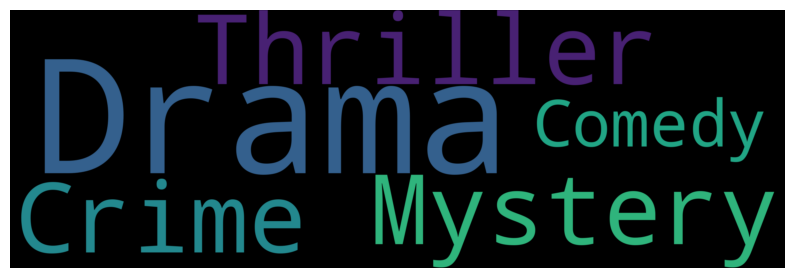

In [ ]:
# Make the index of the top genres into a string for wordcloud
import matplotlib.pyplot as plt

text = ",".join(Top_5_genres.index)
wordcloud = WordCloud(width = 3000, height = 1000, collocations= False, background_color = "black").generate(text)
plt.figure(figsize = (10,10))
#set figure size
plt.imshow(wordcloud, interpolation = "bilinear")
#Display image
plt.axis("off")
plt.show()

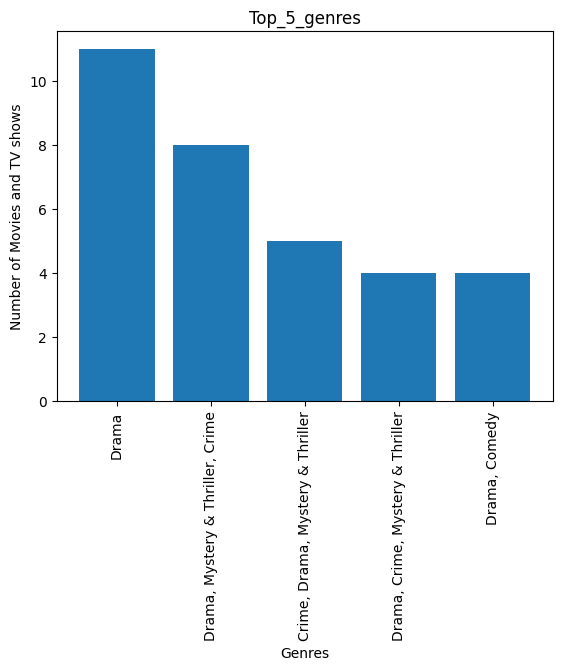

In [ ]:
# Visualize it using barplot
plt.bar(Top_5_genres.index, Top_5_genres.values )
plt.xticks(rotation = 90)
plt.title("Top_5_genres")
plt.xlabel("Genres")
plt.ylabel("Number of Movies and TV shows")
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
significant_stream_count = Final_df["streaming details"][Final_df["streaming details"]!="NaN"].value_counts()
significant_stream_count

streaming details
Netflix                                                                           40
Amazon Prime Video                                                                39
Apple TV                                                                          20
Hotstar                                                                           14
Bookmyshow                                                                         9
Jio Cinema                                                                         8
Apple TV Plus                                                                      7
Zee5                                                                               6
Netflix,Amazon Prime Video                                                         3
Netflix,Crunchyroll                                                                3
Sony Liv                                                                           3
Lionsgate Play,Lionsgate Play Apple TV Channel,

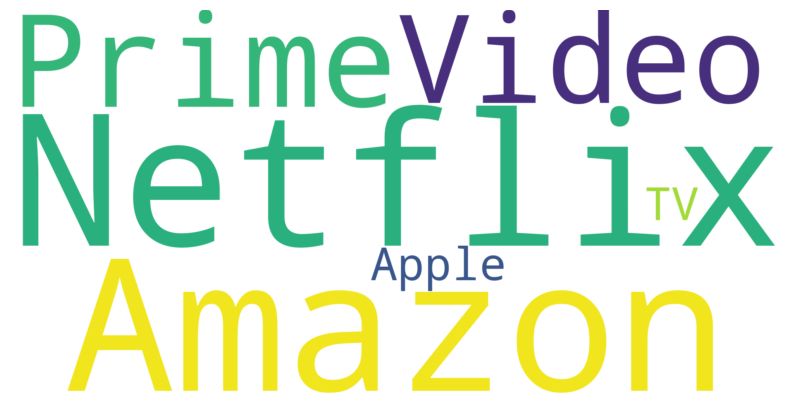

In [ ]:
#Let's Visvalize it using word cloud
Predominant_stream = significant_stream_count.head(3)
text2 =",".join(Predominant_stream.index)
wordcloud = WordCloud(width = 2000, height= 1000, collocations = False, background_color="white").generate(text2)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

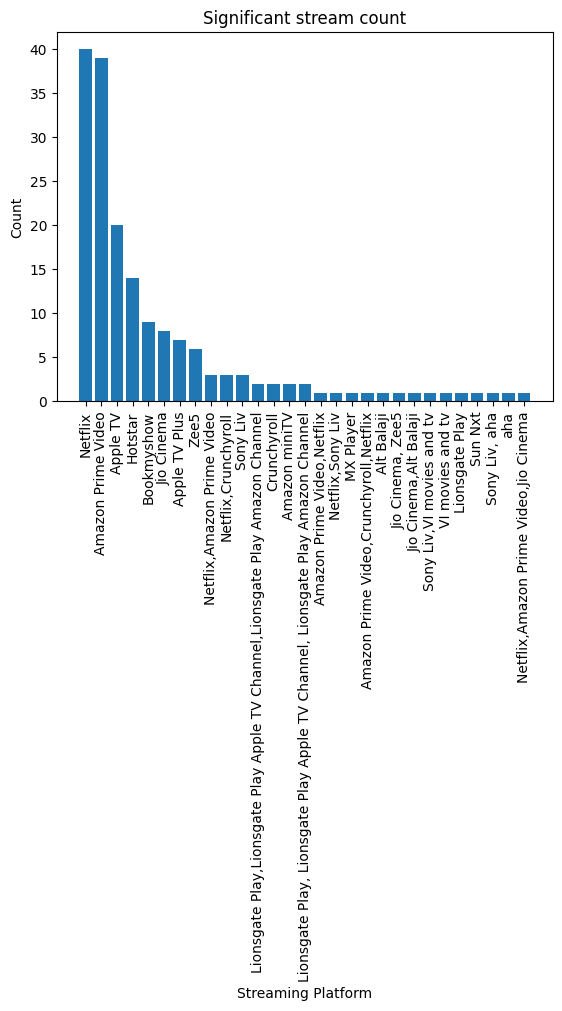

In [ ]:
# Visualize it using barplot
cloud = significant_stream_count
plt.bar(cloud.index, cloud.values )
plt.xticks(rotation = 90)
plt.title("Significant stream count")
plt.xlabel("Streaming Platform")
plt.ylabel("Count")
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
Final_df.to_csv("FinaL_Data")

In [ ]:
#saving filter data as Filter Data in csv format
filter_df.to_csv("Filter_Data")

# **Dataset Drive Link (View Access with Anyone) -**

In [ ]:
Dataset_Drive_Link = 'https://drive.google.com/drive/folders/1LJWLVY43c3nLz53wuoLFyucWKQaPQ8Q3?usp=sharing'

# ***Congratulations!!! You have completed your Assignment.***